# Decimate the magnetic anomaly data

I was going to use [Verde Spline interpolator](https://www.fatiando.org/verde/latest/gallery/spline.html?highlight=regular), but it gave me a MemoryError. The same happened with most of scipy interpolators.

Since I decimated the data to a regular grid, I can take advantage of that when interpolating. So, I'll use a simple 2D interpolation on a regular grid inside a moving window.

In [1]:
import matplotlib.pyplot as plt
import verde as vd
%matplotlib inline
import seaborn as sns
sns.set_style('ticks')

import numpy as np

In [2]:
# Load the data as read only
data = np.load('../data/interim/MAGIGRF_DECIMATED_150x150m.npy', mmap_mode='r')

This shall be the final interpolated grid size

In [3]:
x = np.unique(data['x']) # Grid x coordinates
y = np.unique(data['y']) # Grid y coordinates

print('Grid size: {0} x {1}'.format(x.shape[0], y.shape[0]))

Grid size: 2903 x 2041


In [4]:
# Start with a sample blank image to see where the holes are
shape = (x.shape[0], y.shape[0])
img = np.full(shape, np.nan)

In [5]:
# Fill the bins as needed
img[np.digitize(data['x'], x) - 1, np.digitize(data['y'], y) - 1] = data['data']

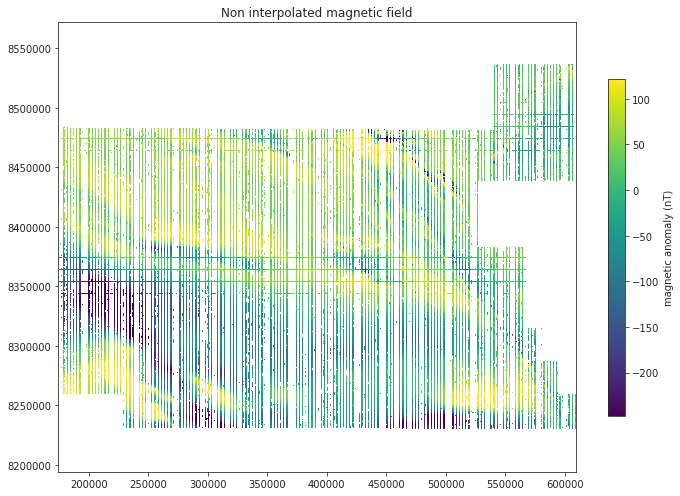

In [6]:
vmin, vmax = np.percentile(data['data'], [2,98])

plt.figure(figsize=(10,7))
ax = plt.subplot(111)
extent=[x.min(),x.max(), y.min(), y.max()]
ax.set_title('Non interpolated magnetic field')
im = ax.imshow(img.T, interpolation='none', aspect='auto',
           vmin=vmin, vmax=vmax, cmap='viridis',
           extent=extent)
plt.colorbar(im, shrink=0.75, label='magnetic anomaly (nT)')
ax.set_aspect('equal', 'datalim')
plt.tight_layout();

Note: Some pixels appear missing due to the image size on the plot

In [7]:
from scipy.interpolate import interp1d

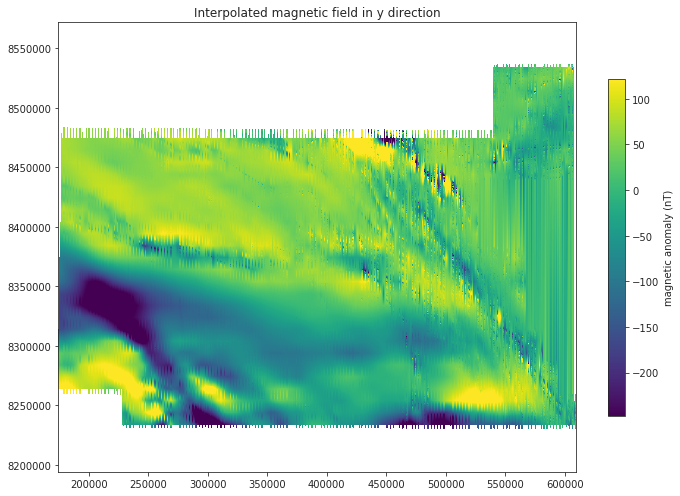

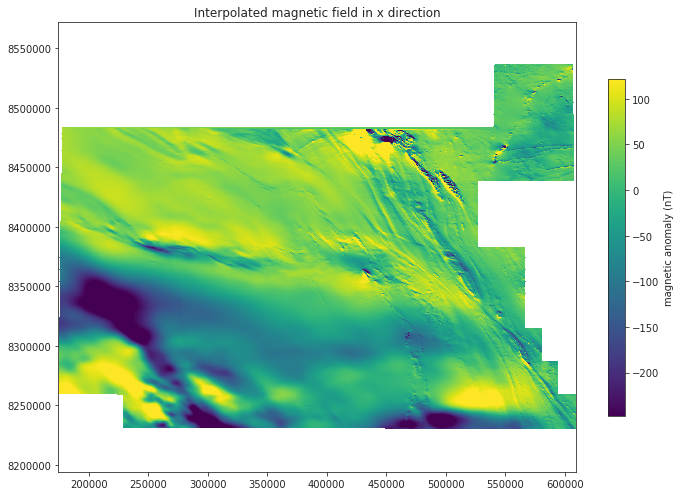

In [8]:
interp = {}

interp['y'] = np.array([np.interp(y, xp=y[~np.isnan(row)], fp=row[~np.isnan(row)],
                               left=np.nan, right=np.nan) for row in img])

interp['x'] = np.array([np.interp(x, xp=x[~np.isnan(col)], fp=col[~np.isnan(col)],
                               left=np.nan, right=np.nan) for col in img.T]).T


for axis in interp:
    plt.figure(figsize=(10,7))
    ax = plt.subplot(111)
    extent=[x.min(),x.max(), y.min(), y.max()]
    ax.set_title('Interpolated magnetic field in {} direction'.format(axis))
    im = ax.imshow(interp[axis].T, interpolation='none', aspect='auto',
               vmin=vmin, vmax=vmax, cmap='viridis',
               extent=extent)
    plt.colorbar(im, shrink=0.75, label='magnetic anomaly (nT)')
    ax.set_aspect('equal', 'datalim')
    plt.tight_layout()
    plt.show()
    plt.close();

In [9]:
mean = (interp['x'] + interp['y'])/2

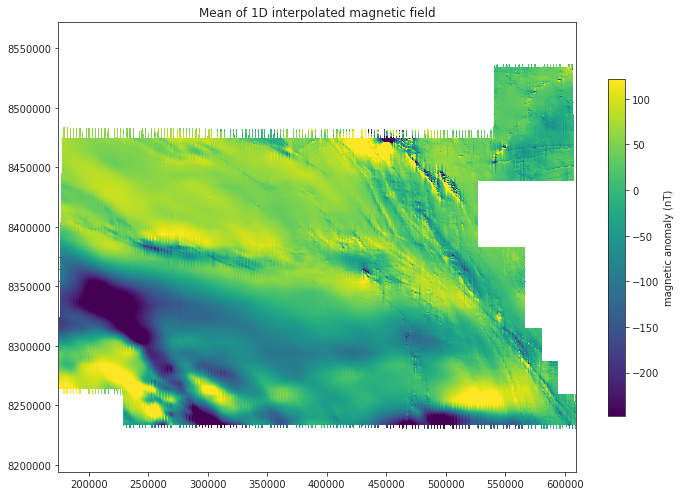

In [10]:
plt.figure(figsize=(10,7))
ax = plt.subplot(111)
extent=[x.min(),x.max(), y.min(), y.max()]
ax.set_title('Mean of 1D interpolated magnetic field')
im = ax.imshow(mean.T, interpolation='none', aspect='auto',
           vmin=vmin, vmax=vmax, cmap='viridis',
           extent=extent)
plt.colorbar(im, shrink=0.75, label='magnetic anomaly (nT)')
ax.set_aspect('equal', 'datalim')
plt.tight_layout()
plt.show()
plt.close();